# **Dataset Description**


See, fork, and run a random forest benchmark model through Kaggle Scripts

You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

# **Data Fields**


**datetime** - hourly date + timestamp  

**season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter

**holiday** - whether the day is considered a holiday

**workingday** - whether the day is neither a weekend nor holiday

**weather** -
*   1: Clear, Few clouds, Partly cloudy, Partly cloudy
*   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
*   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
*   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**temp** - temperature in Celsius

**atemp** - "feels like" temperature in Celsius

**humidity** - relative humidity

**windspeed** - wind speed

**casual** - number of non-registered user rentals initiated

**registereds**- number of registered user rentals initiated

**count** - number of total rentals

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
DATA_DIR = Path("../data")
TRAIN_PATH = DATA_DIR / "train.csv"
TEST_PATH  = DATA_DIR / "test.csv"

train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

bike_train = {"shape": train.shape,"columns": train.columns.tolist()}
bike_test = { "shape": test.shape, "columns": test.columns.tolist()}

plt.figure(figsize=(8, 4))
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<Figure size 800x400 with 0 Axes>

In [5]:
train.info()
train.describe().T
train = train.drop(columns=["atemp"]) #not needed for predictions


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
duplicate_rows =test.duplicated().sum()
if duplicate_rows > 0:
    print("\nNumber of duplicate rows:", duplicate_rows)
    print("Duplicate Rows:")
    print([test.duplicated()])
else:
    print("\nNo duplicate rows found.")

test.isnull().sum()


No duplicate rows found.


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [7]:
print(train.columns)

# Convert 'datetime' column to datetime objects instead of strings
train["datetime"] = pd.to_datetime(train["datetime"])

train["hour"] = train["datetime"].dt.hour #hour 0-23
train["month"] = train["datetime"].dt.month #month 1-12
train["weekday"] = train["datetime"].dt.weekday+1 #days 1-6

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


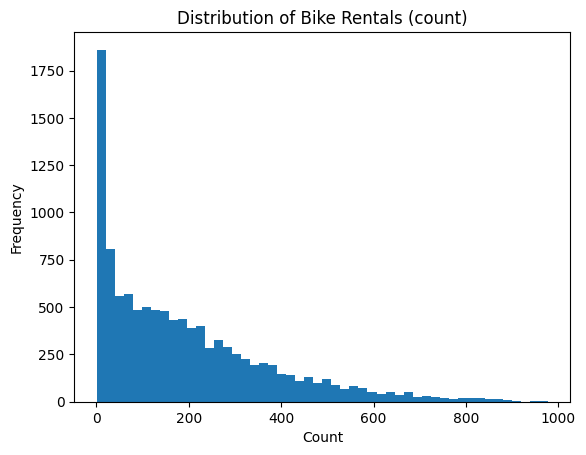

In [8]:
plt.figure()
plt.hist(train["count"], bins=50)
plt.title("Distribution of Bike Rentals (count)")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

Rental Demand is right skewed meaning that

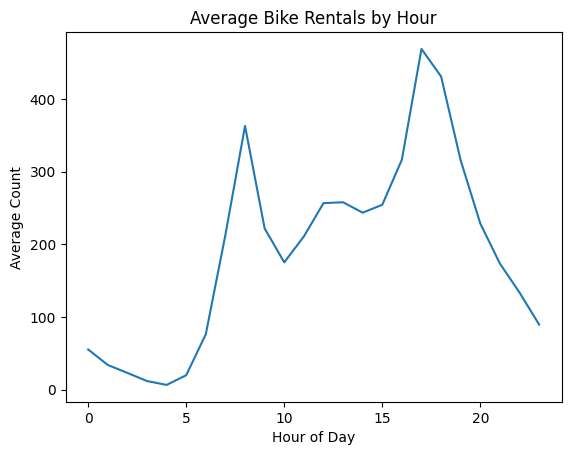

In [9]:
# 2. Average rentals by hour
plt.figure()
train.groupby("hour")["count"].mean().plot()
plt.title("Average Bike Rentals by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Count")
plt.show()

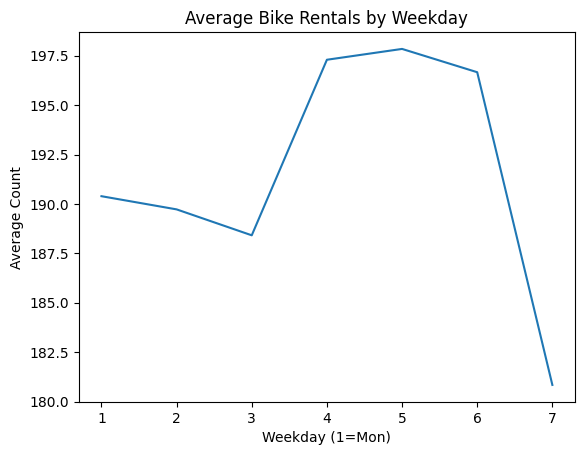

In [10]:
# 3. Average rentals by weekday
plt.figure()
train.groupby("weekday")["count"].mean().plot()
plt.title("Average Bike Rentals by Weekday")
plt.xlabel("Weekday (1=Mon)")
plt.ylabel("Average Count")
plt.show()


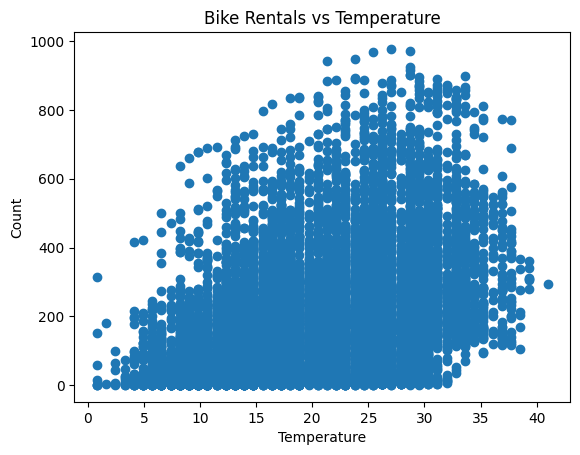

In [11]:
# 4. Rentals vs Temperature
plt.figure()
plt.scatter(train["temp"], train["count"])
plt.title("Bike Rentals vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

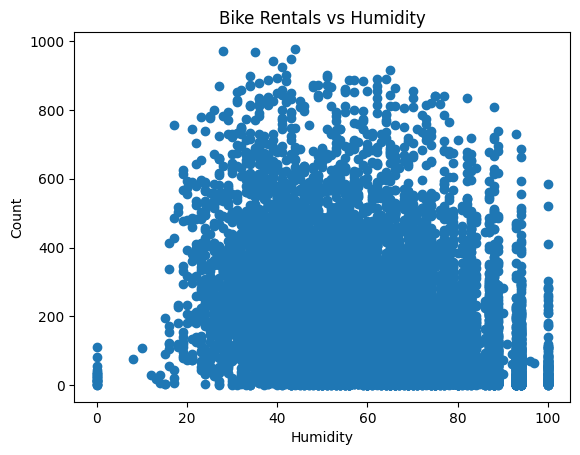

In [12]:
# 5. Rentals vs Humidity
plt.figure()
plt.scatter(train["humidity"], train["count"])
plt.title("Bike Rentals vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.show()

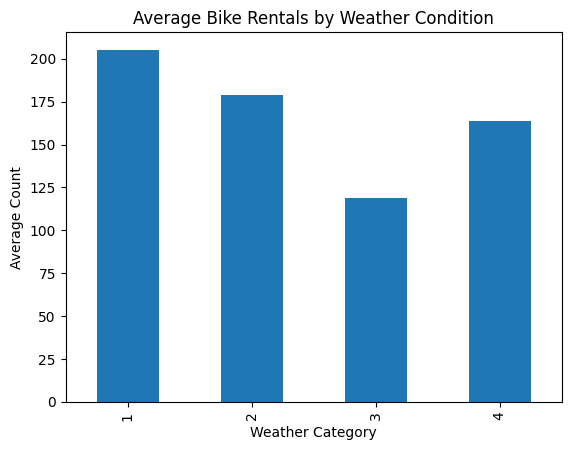

In [13]:
# 6. Average rentals by weather condition
plt.figure()
train.groupby("weather")["count"].mean().plot(kind="bar")
plt.title("Average Bike Rentals by Weather Condition")
plt.xlabel("Weather Category")
plt.ylabel("Average Count")
plt.show()